# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
model = Sequential()

model.add(Dense(units=256,
input_dim=784,
kernel_initializer='normal',
activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.add(Dense(units=10,
kernel_initializer='normal',
activation='softmax'))

In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [7]:
model.compile(loss='categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])

In [8]:
train_history =model.fit(x=x_Train_normalize,
y=y_Train_OneHot,validation_split=0.2,
epochs=10, batch_size=200,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4405 - acc: 0.8821 - val_loss: 0.2189 - val_acc: 0.9406
Epoch 2/10
 - 2s - loss: 0.1916 - acc: 0.9455 - val_loss: 0.1563 - val_acc: 0.9559
Epoch 3/10
 - 2s - loss: 0.1362 - acc: 0.9614 - val_loss: 0.1265 - val_acc: 0.9643
Epoch 4/10
 - 3s - loss: 0.1035 - acc: 0.9701 - val_loss: 0.1124 - val_acc: 0.9681
Epoch 5/10
 - 3s - loss: 0.0816 - acc: 0.9774 - val_loss: 0.0983 - val_acc: 0.9715
Epoch 6/10
 - 2s - loss: 0.0664 - acc: 0.9817 - val_loss: 0.0938 - val_acc: 0.9722
Epoch 7/10
 - 2s - loss: 0.0548 - acc: 0.9849 - val_loss: 0.0908 - val_acc: 0.9739
Epoch 8/10
 - 2s - loss: 0.0460 - acc: 0.9877 - val_loss: 0.0822 - val_acc: 0.9762
Epoch 9/10
 - 2s - loss: 0.0382 - acc: 0.9900 - val_loss: 0.0815 - val_acc: 0.9765
Epoch 10/10
 - 3s - loss: 0.0319 - acc: 0.9917 - val_loss: 0.0805 - val_acc: 0.9768


# 以圖形顯示訓練過程

In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

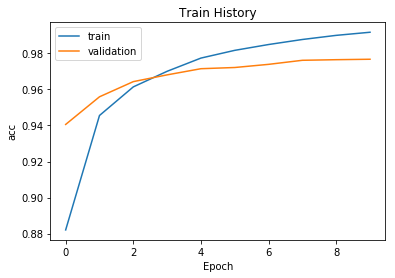

In [10]:
show_train_history(train_history,'acc','val_acc')

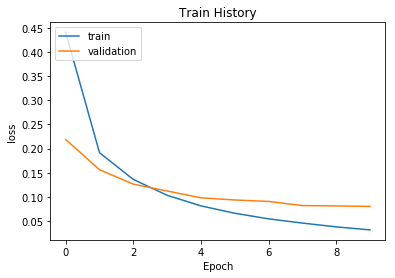

In [11]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [12]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 59us/step

accuracy= 0.9759


# 進行預測

In [13]:
prediction=model.predict_classes(x_Test)

In [14]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [15]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
    idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

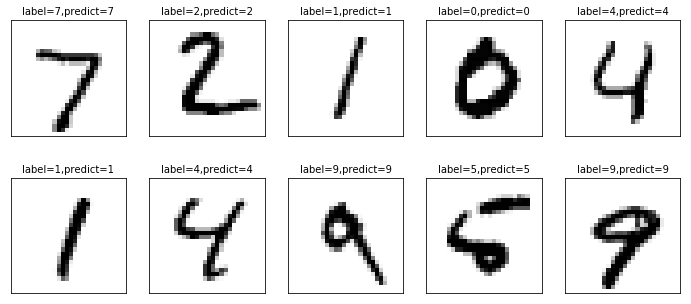

In [16]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=0)

# confusion matrix

In [17]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1011,1,1,0,2,4,7,0
3,0,0,3,994,0,0,0,3,6,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,17,1,851,7,1,9,3
6,6,3,3,1,4,3,937,0,1,0
7,1,5,13,7,1,0,0,986,6,9
8,5,0,3,5,2,1,1,2,954,1


In [20]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [21]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


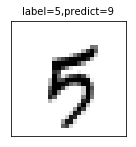

In [22]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1289,num=1)